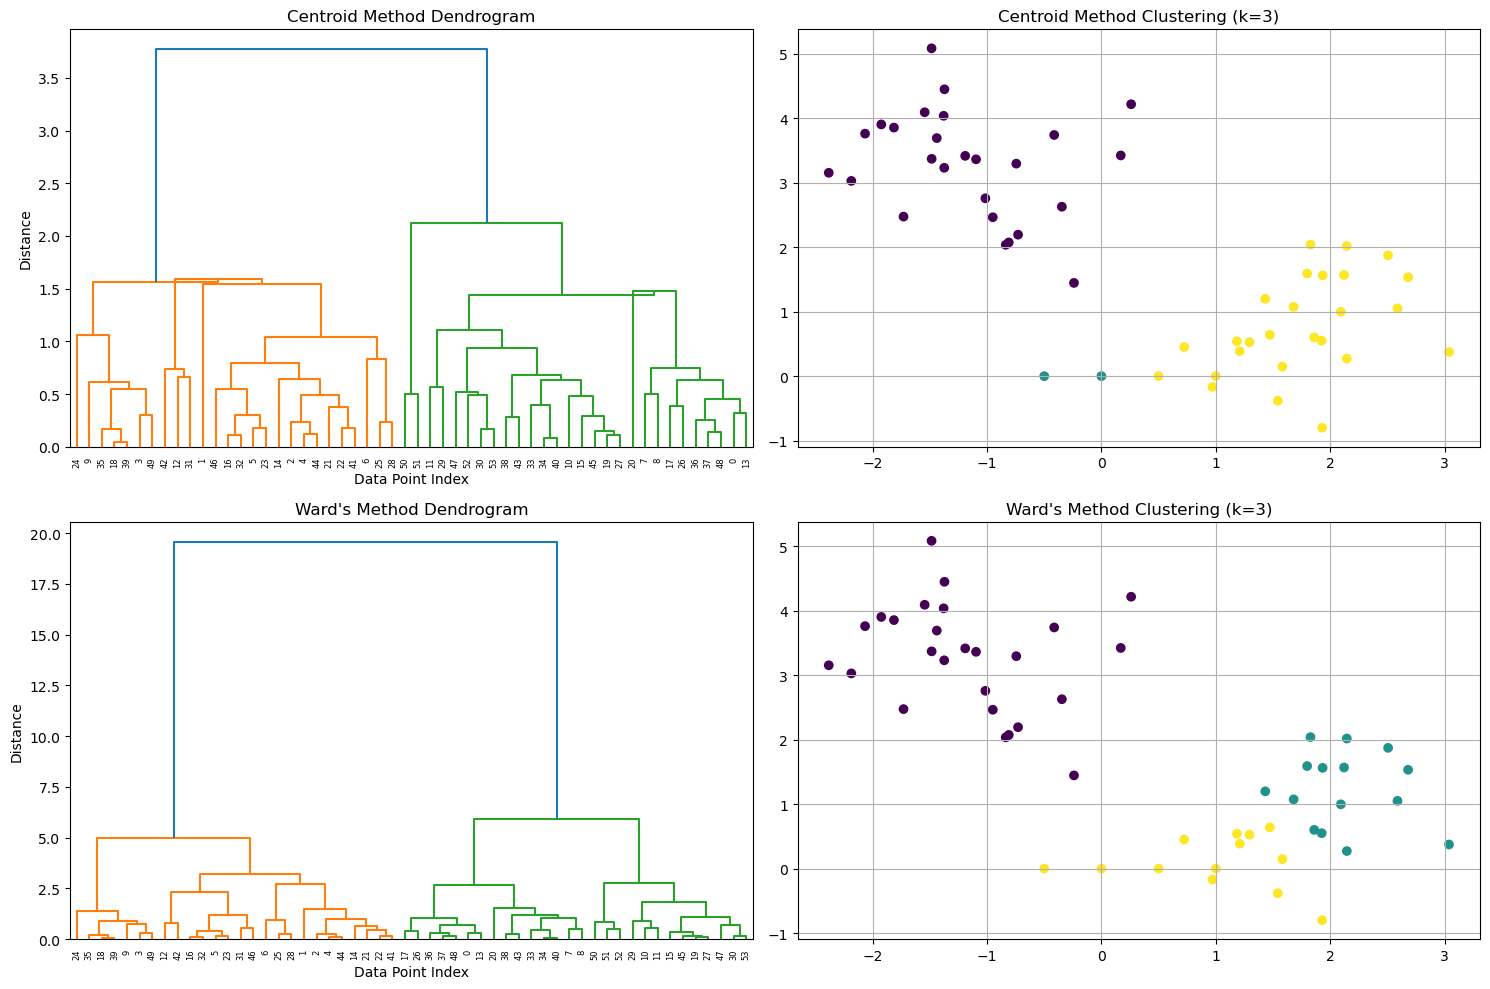

クラスタリングの結果を 'ward_vs_centroid_clustering.png' として保存しました。


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# --- 1. データセットの生成 ---
# 2つの主要なクラスタを生成
n_samples = 50
X, y = make_blobs(n_samples=n_samples, centers=2, n_features=2,
                  cluster_std=0.8, center_box=(-4, 4), random_state=42)

# 2つのクラスタをつなぐ「橋」となるデータ点を追加
# これが「鎖効果」を誘発しやすくなります
bridge = np.array([[-0.5, 0], [0, 0], [0.5, 0], [1.0, 0]])
X_full = np.concatenate([X, bridge])

# --- 2. 重心法 (Centroid Method) によるクラスタリング ---

# linkage関数でクラスタ間の距離行列を計算
# method='centroid' を指定
#
# ■■■ 重心法における「クラスタ間距離」の定義 ■■■
# 2つのクラスタ C_i と C_j のそれぞれの重心（データの平均ベクトル）μ_i と μ_j を計算し、
# その重心間のユークリッド距離をクラスタ間の距離とします。
# 比較的計算は簡単ですが、下のデンドログラムで示すように、
# 新しく併合されたクラスタが、元のクラスタのどちらかに近くなる「逆転」現象が起きやすく、
# 鎖効果につながることがあります。
linked_centroid = linkage(X_full, method='centroid')

# --- 3. ウォード法 (Ward's Method) によるクラスタリング ---

# linkage関数でクラスタ間の距離行列を計算
# method='ward' を指定
#
# ■■■ ウォード法における「クラスタ間距離」の定義 ■■■
# 2つのクラスタ C_i と C_j を併合した際に、
# 「クラスタ内の分散（各点から重心までの距離の2乗和）がどれだけ増加するか」を計算します。
# この増加量が最小となるペアを併合していきます。
# 結果として、コンパクトで均質なクラスタが形成されやすく、鎖効果に強い性質を持ちます。
linked_ward = linkage(X_full, method='ward')


# --- 4. 結果の可視化 ---
plt.figure(figsize=(15, 10))

# 重心法のデンドログラム
plt.subplot(2, 2, 1)
plt.title('Centroid Method Dendrogram')
plt.xlabel('Data Point Index')
plt.ylabel('Distance')
dendrogram(linked_centroid)

# 重心法の結果の散布図 (3クラスタに分割)
clusters_centroid = fcluster(linked_centroid, 3, criterion='maxclust')
plt.subplot(2, 2, 2)
plt.title('Centroid Method Clustering (k=3)')
plt.scatter(X_full[:, 0], X_full[:, 1], c=clusters_centroid, cmap='viridis')
plt.grid(True)


# ウォード法のデンドログラム
plt.subplot(2, 2, 3)
plt.title("Ward's Method Dendrogram")
plt.xlabel('Data Point Index')
plt.ylabel('Distance')
dendrogram(linked_ward)

# ウォード法の結果の散布図 (3クラスタに分割)
clusters_ward = fcluster(linked_ward, 3, criterion='maxclust')
plt.subplot(2, 2, 4)
plt.title("Ward's Method Clustering (k=3)")
plt.scatter(X_full[:, 0], X_full[:, 1], c=clusters_ward, cmap='viridis')
plt.grid(True)

plt.tight_layout()
plt.savefig('ward_vs_centroid_clustering.png')
plt.show()

print("クラスタリングの結果を 'ward_vs_centroid_clustering.png' として保存しました。")